In [1]:
import uproot
import vector
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Final paper used ffNtuple_1.root
sample_file = uproot.open("../ffNtuple_2Mu2E_500_1p2_9p6.root")
sample_file.classnames()
tree = sample_file['ffNtuplizer/ffNtuple']
branches = tree.arrays()
muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                      "py": branches['muon_p4.fCoordinates.fY'],
                      "pz": branches['muon_p4.fCoordinates.fZ'],
                      "t": branches['muon_p4.fCoordinates.fT']}  )

In [11]:
abs(branches["gen_pid"])==13

<Array [[False, False, ... False, False]] type='38080 * var * bool'>

In [12]:
two_muons_mask = branches['muon_n'] == 2

In [13]:
two_muons_p4 = muon_p4[two_muons_mask]
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]
sum_p4 = first_muon_p4 + second_muon_p4

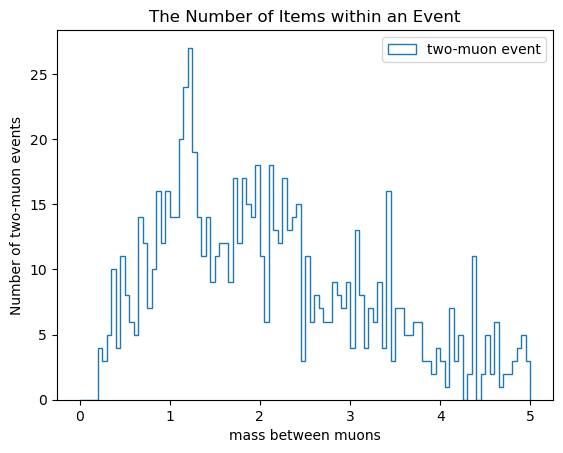

In [14]:
#plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100, label = 'two-muon event',histtype='step')
plt.hist(sum_p4.mass, bins=100, range=(0,5), label = 'two-muon event',histtype='step')
plt.title('The Number of Items within an Event')
plt.xlabel('mass between muons')
plt.ylabel('Number of two-muon events')
plt.legend(loc="upper right")
plt.show()

In [16]:
#500 is the bound state mass
#1.2 is the dark photon mass